In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import pickle
import numpy as np
from keras_preprocessing.sequence import pad_sequences
from util import preprocess
from util import generate_batch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


classes = ['RRab', 'RRc','RRd', 'Blazhko','Ecl', 'EA' , 'Rot', 'LPV','δ-Scuti','ACEP', 'Cep-II']
from util import cm_plot

2023-02-08 19:49:53.911519: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:49:54.006191: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:49:54.403223: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:49:55.306884: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 19:49:55.316007: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.0
Normalized confusion matrix
[[8.77314815e-01 2.31481481e-03 9.25925926e-03 6.01851852e-02
  0.00000000e+00 0.00000000e+00 6.94444444e-03 0.00000000e+00
  0.00000000e+00 4.39814815e-02 0.00000000e+00]
 [0.00000000e+00 8.96000000e-01 8.53333333e-02 0.00000000e+00
  8.00000000e-03 0.00000000e+00 2.66666667e-03 0.00000000e+00
  5.33333333e-03 0.00000000e+00 2.66666667e-03]
 [0.00000000e+00 1.00000000e-01 8.60000000e-01 2.00000000e-02
  0.00000000e+00 0.00000000e+00 2.00000000e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 0.00000000e+00 5.88235294e-02 5.88235294e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.31914894e-04 5.31914894e-04 1.06382979e-03 0.00000000e+00
  7.61702128e-01 5.85106383e-02 1.75531915e-01 0.00000000e+00
  0.00000000e+00 1.06382979e-03 1.06382979e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 19:53:07.535991: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 19:53:08.094893: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 19:53:08.784201: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:53:09.213079: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:53:09.222308: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.1
Normalized confusion matrix
[[9.00462963e-01 2.31481481e-03 1.38888889e-02 4.39814815e-02
  4.62962963e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.47222222e-02 0.00000000e+00]
 [5.33333333e-03 8.42666667e-01 1.22666667e-01 0.00000000e+00
  1.06666667e-02 0.00000000e+00 1.33333333e-02 0.00000000e+00
  5.33333333e-03 0.00000000e+00 0.00000000e+00]
 [4.00000000e-02 1.60000000e-01 7.80000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.00000000e-02 0.00000000e+00]
 [4.70588235e-01 0.00000000e+00 0.00000000e+00 5.29411765e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.12765957e-03 2.12765957e-03 0.00000000e+00
  8.04787234e-01 4.52127660e-02 1.44680851e-01 0.00000000e+00
  0.00000000e+00 5.31914894e-04 5.31914894e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 19:56:22.169261: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:56:22.556235: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:56:22.858989: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 19:56:22.867741: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 19:56:23.418935: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.2
Normalized confusion matrix
[[8.68055556e-01 4.62962963e-03 2.31481481e-03 7.87037037e-02
  0.00000000e+00 0.00000000e+00 1.38888889e-02 0.00000000e+00
  0.00000000e+00 3.24074074e-02 0.00000000e+00]
 [0.00000000e+00 8.93333333e-01 9.33333333e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.33333333e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.00000000e-02 1.20000000e-01 8.20000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.17647059e-01 0.00000000e+00 0.00000000e+00 8.82352941e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06382979e-03 5.31914894e-04 1.06382979e-03 0.00000000e+00
  7.95212766e-01 5.21276596e-02 1.44148936e-01 1.59574468e-03
  5.31914894e-04 1.06382979e-03 2.65957447e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 19:59:35.209480: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 19:59:35.496413: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:59:36.171682: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 19:59:36.420445: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 19:59:36.510679: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.3
Normalized confusion matrix
[[8.81944444e-01 4.62962963e-03 9.25925926e-03 7.87037037e-02
  2.31481481e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.31481481e-02 0.00000000e+00]
 [2.66666667e-03 8.45333333e-01 1.17333333e-01 0.00000000e+00
  5.33333333e-03 5.33333333e-03 1.60000000e-02 0.00000000e+00
  8.00000000e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 1.60000000e-01 7.60000000e-01 4.00000000e-02
  0.00000000e+00 0.00000000e+00 2.00000000e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.88235294e-02 0.00000000e+00 0.00000000e+00 8.23529412e-01
  0.00000000e+00 0.00000000e+00 5.88235294e-02 0.00000000e+00
  0.00000000e+00 5.88235294e-02 0.00000000e+00]
 [0.00000000e+00 5.31914894e-04 0.00000000e+00 5.31914894e-04
  7.72340426e-01 5.10638298e-02 1.73404255e-01 0.00000000e+00
  0.00000000e+00 1.06382979e-03 1.06382979e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 20:02:45.299708: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:02:45.519397: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:02:45.528471: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:02:57.707913: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:02:58.028226: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.4
Normalized confusion matrix
[[8.77314815e-01 2.31481481e-03 6.94444444e-03 7.87037037e-02
  0.00000000e+00 0.00000000e+00 2.31481481e-03 0.00000000e+00
  0.00000000e+00 3.24074074e-02 0.00000000e+00]
 [0.00000000e+00 8.74666667e-01 9.33333333e-02 5.33333333e-03
  1.86666667e-02 2.66666667e-03 2.66666667e-03 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 1.40000000e-01 8.40000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.76470588e-01 0.00000000e+00 1.17647059e-01 7.05882353e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.31914894e-04 1.06382979e-03 5.31914894e-04 0.00000000e+00
  7.93617021e-01 5.05319149e-02 1.50000000e-01 0.00000000e+00
  5.31914894e-04 5.31914894e-04 2.65957447e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 20:05:59.959187: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:06:00.009498: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:06:00.089684: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:06:00.098162: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:06:00.270811: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.5
Normalized confusion matrix
[[8.54166667e-01 0.00000000e+00 1.38888889e-02 8.33333333e-02
  2.31481481e-03 0.00000000e+00 2.31481481e-03 0.00000000e+00
  0.00000000e+00 4.39814815e-02 0.00000000e+00]
 [2.66666667e-03 8.34666667e-01 1.20000000e-01 2.66666667e-03
  1.86666667e-02 8.00000000e-03 1.06666667e-02 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 2.00000000e-02 8.80000000e-01 4.00000000e-02
  0.00000000e+00 0.00000000e+00 4.00000000e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.88235294e-02 0.00000000e+00 0.00000000e+00 9.41176471e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06382979e-03 0.00000000e+00 0.00000000e+00 1.06382979e-03
  7.78191489e-01 5.05319149e-02 1.65425532e-01 1.59574468e-03
  5.31914894e-04 5.31914894e-04 1.06382979e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 20:09:22.022647: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:09:22.955240: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:09:23.300884: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:09:23.313020: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:09:23.612255: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.6
Normalized confusion matrix
[[8.65740741e-01 2.31481481e-03 1.15740741e-02 6.25000000e-02
  0.00000000e+00 2.31481481e-03 6.94444444e-03 0.00000000e+00
  0.00000000e+00 4.86111111e-02 0.00000000e+00]
 [2.66666667e-03 8.56000000e-01 1.25333333e-01 0.00000000e+00
  5.33333333e-03 2.66666667e-03 5.33333333e-03 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 1.60000000e-01 7.80000000e-01 2.00000000e-02
  2.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.94117647e-01 0.00000000e+00 5.88235294e-02 6.47058824e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.31914894e-04 1.06382979e-03 0.00000000e+00
  7.98404255e-01 4.52127660e-02 1.51595745e-01 1.59574468e-03
  0.00000000e+00 1.06382979e-03 5.31914894e-04]
 [2.22222222e-03 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 20:12:52.110316: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:12:52.449277: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:12:53.235687: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:12:53.522075: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:12:53.627697: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.7
Normalized confusion matrix
[[8.86574074e-01 2.31481481e-03 6.94444444e-03 7.40740741e-02
  0.00000000e+00 0.00000000e+00 2.31481481e-03 0.00000000e+00
  0.00000000e+00 2.31481481e-02 4.62962963e-03]
 [0.00000000e+00 8.53333333e-01 1.36000000e-01 0.00000000e+00
  5.33333333e-03 0.00000000e+00 2.66666667e-03 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 1.00000000e-01 8.60000000e-01 2.00000000e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.17647059e-01 0.00000000e+00 0.00000000e+00 8.82352941e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.31914894e-04 5.31914894e-04 0.00000000e+00 0.00000000e+00
  7.87234043e-01 4.04255319e-02 1.68617021e-01 0.00000000e+00
  0.00000000e+00 1.06382979e-03 1.59574468e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 20:16:37.712657: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:16:38.030684: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:16:38.043195: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:16:38.746124: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:16:39.056971: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.8
Normalized confusion matrix
[[8.63425926e-01 2.31481481e-03 6.94444444e-03 7.40740741e-02
  2.31481481e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.86111111e-02 2.31481481e-03]
 [0.00000000e+00 8.26666667e-01 1.46666667e-01 0.00000000e+00
  2.66666667e-03 5.33333333e-03 1.60000000e-02 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.80000000e-01 8.00000000e-01 2.00000000e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.17647059e-01 0.00000000e+00 0.00000000e+00 8.82352941e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06382979e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.71808511e-01 4.89361702e-02 1.72872340e-01 5.31914894e-04
  5.31914894e-04 1.59574468e-03 2.65957447e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

2023-02-08 20:20:18.072157: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:20:20.502086: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-02-08 20:20:20.639450: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:20:20.650012: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-02-08 20:20:20.938278: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.9
Normalized confusion matrix
[[8.19444444e-01 4.62962963e-03 6.94444444e-03 1.15740741e-01
  4.62962963e-03 0.00000000e+00 4.62962963e-03 0.00000000e+00
  0.00000000e+00 3.93518519e-02 4.62962963e-03]
 [0.00000000e+00 8.80000000e-01 9.60000000e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.60000000e-02 0.00000000e+00
  8.00000000e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.00000000e-02 8.80000000e-01 2.00000000e-02
  2.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 0.00000000e+00 0.00000000e+00 6.47058824e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06382979e-03 0.00000000e+00 5.31914894e-04 0.00000000e+00
  7.56382979e-01 5.26595745e-02 1.86702128e-01 1.59574468e-03
  0.00000000e+00 0.00000000e+00 1.06382979e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

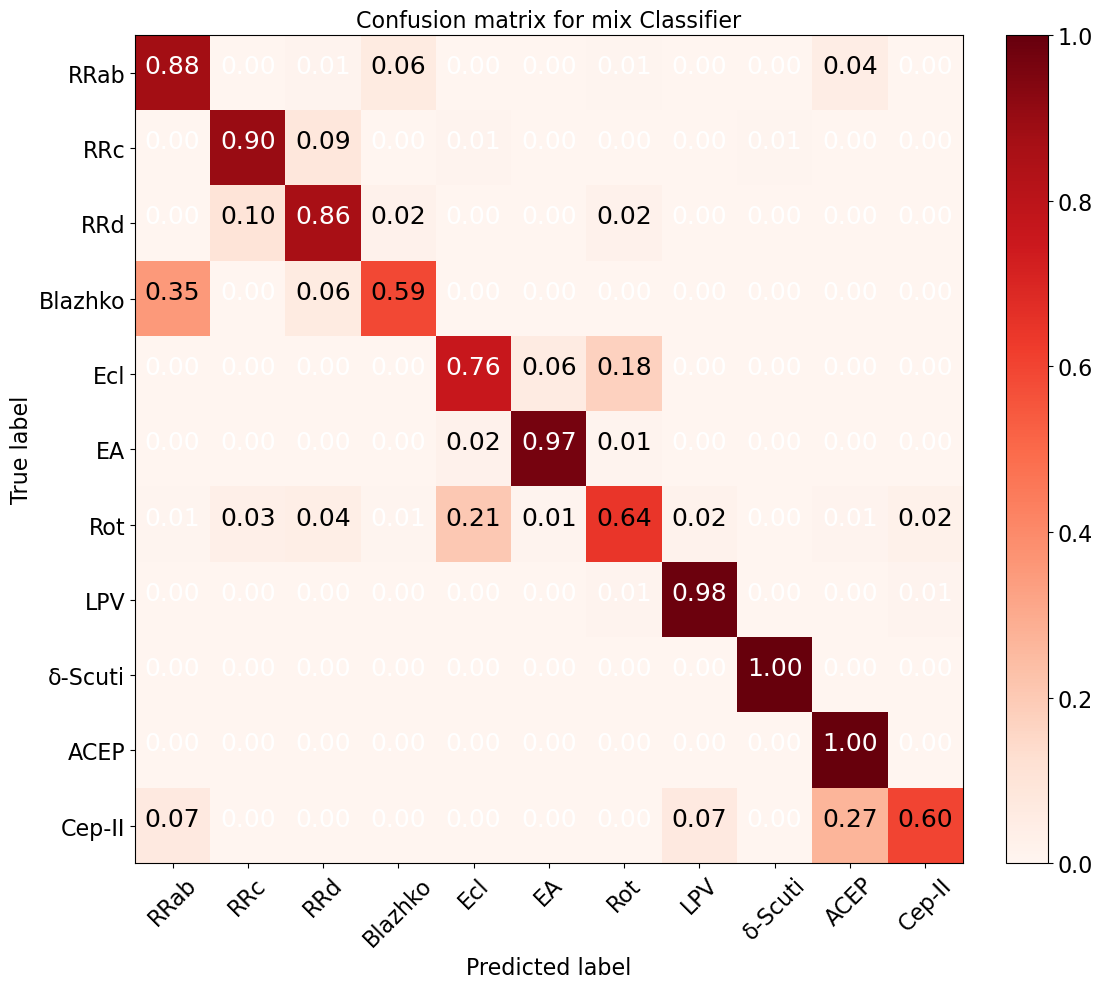

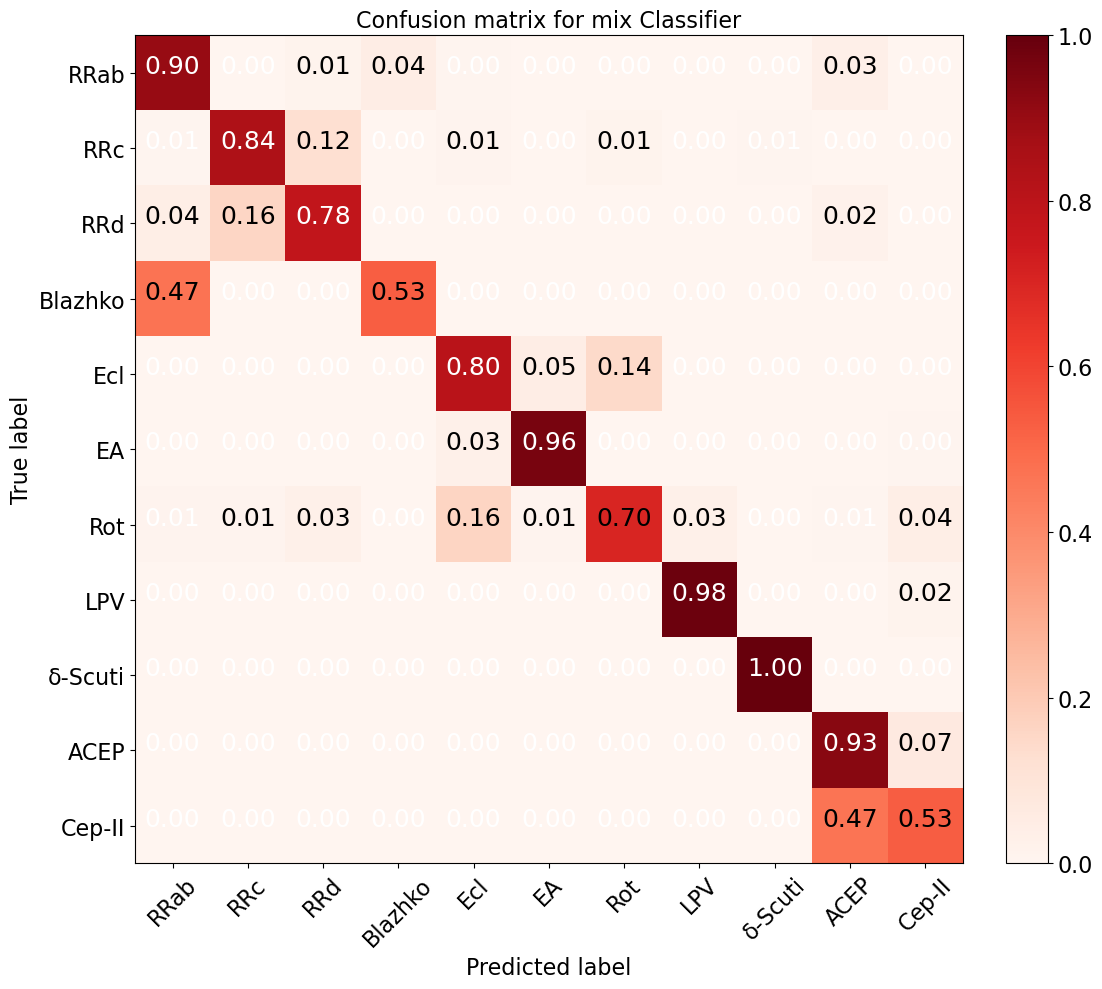

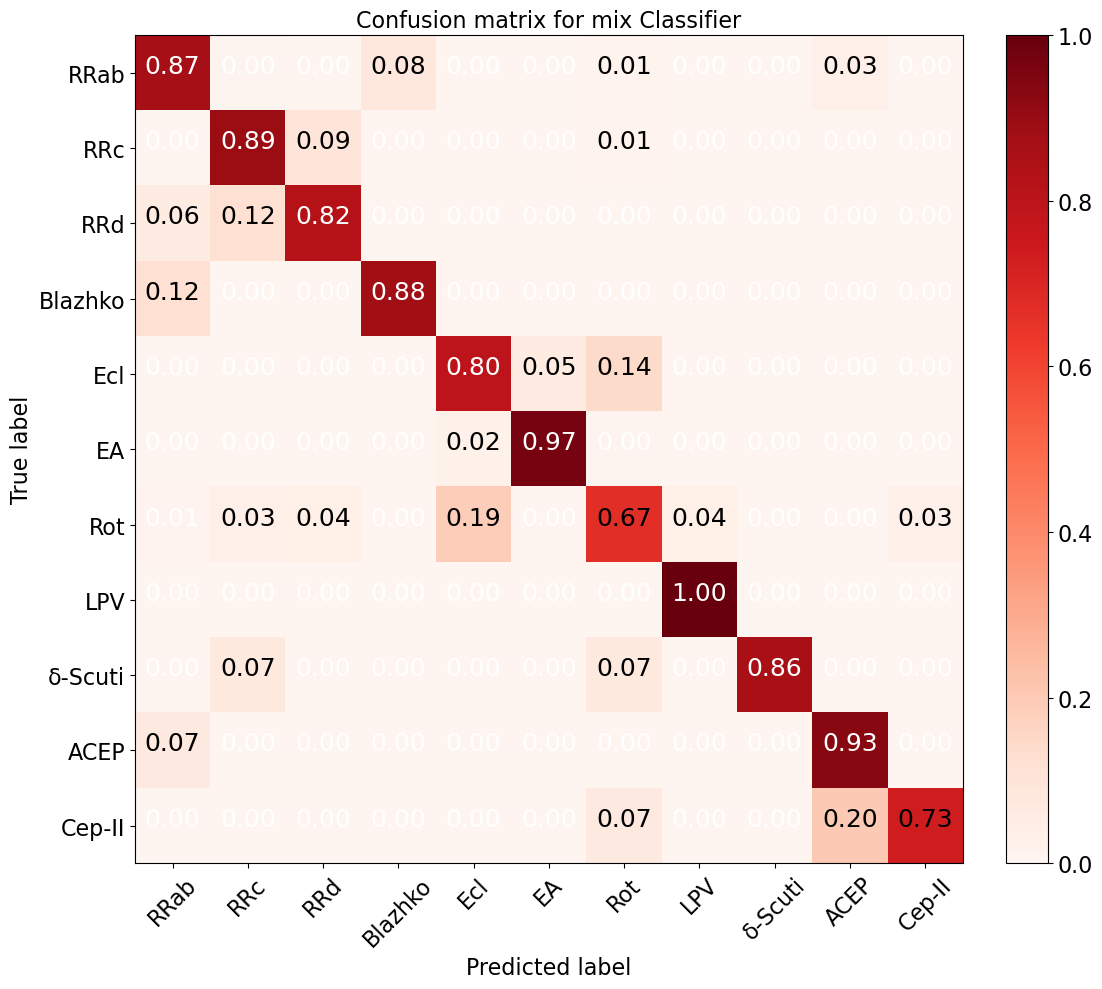

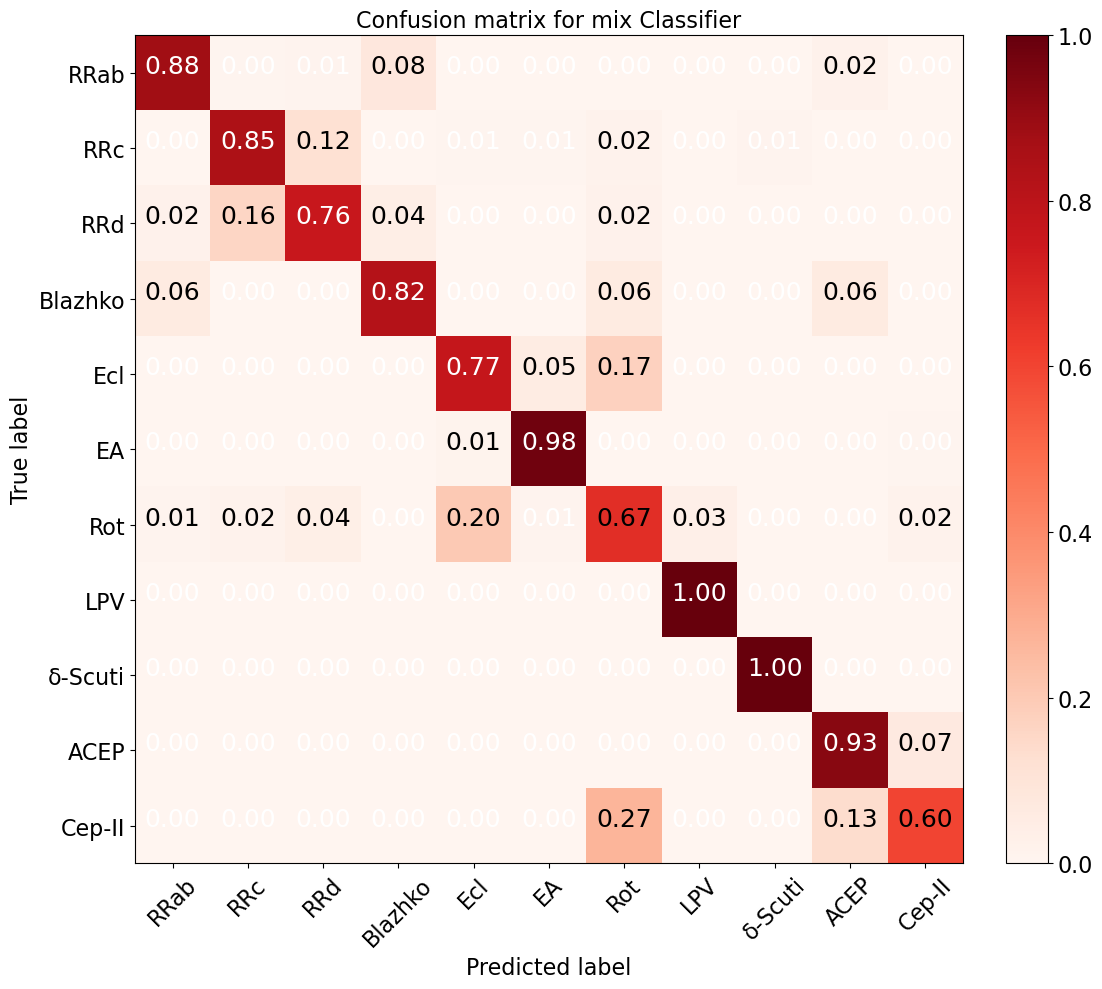

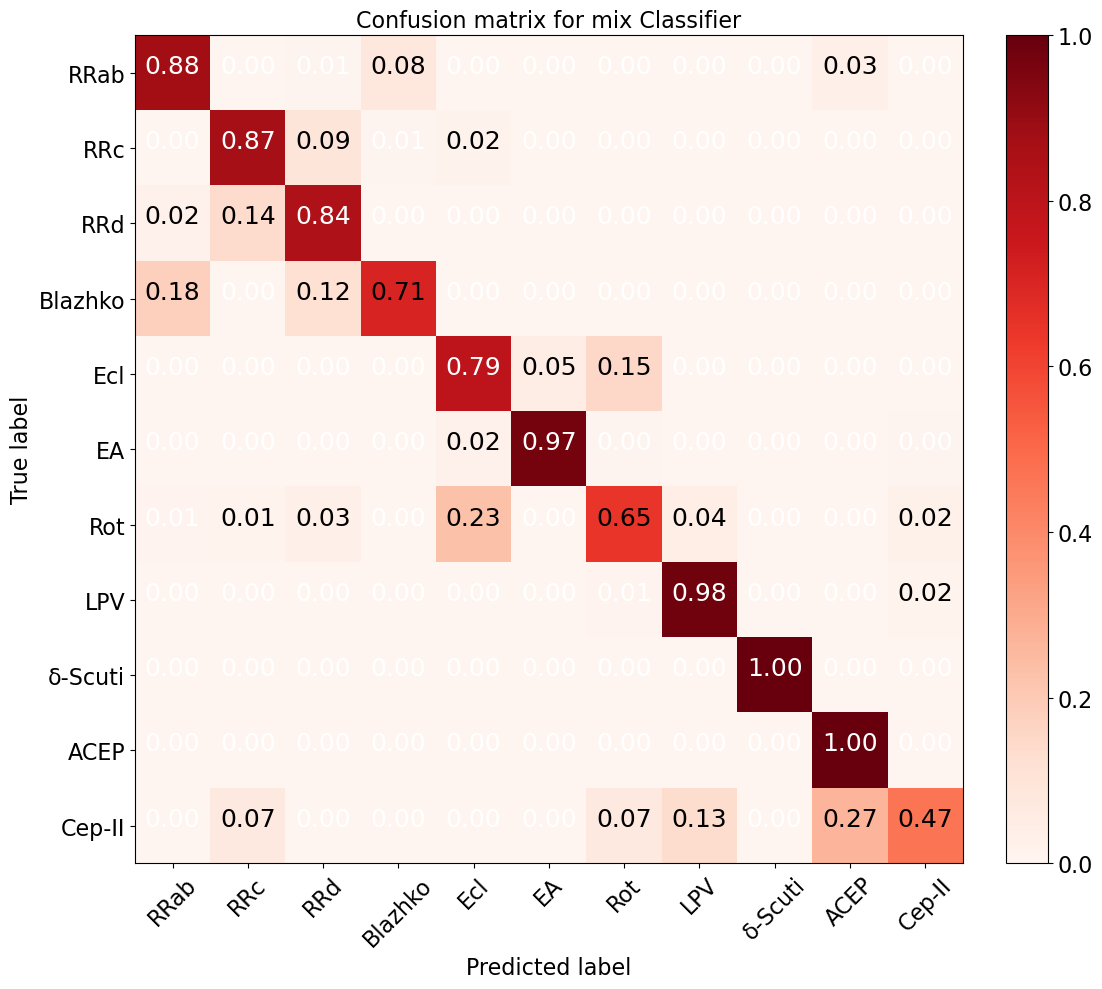

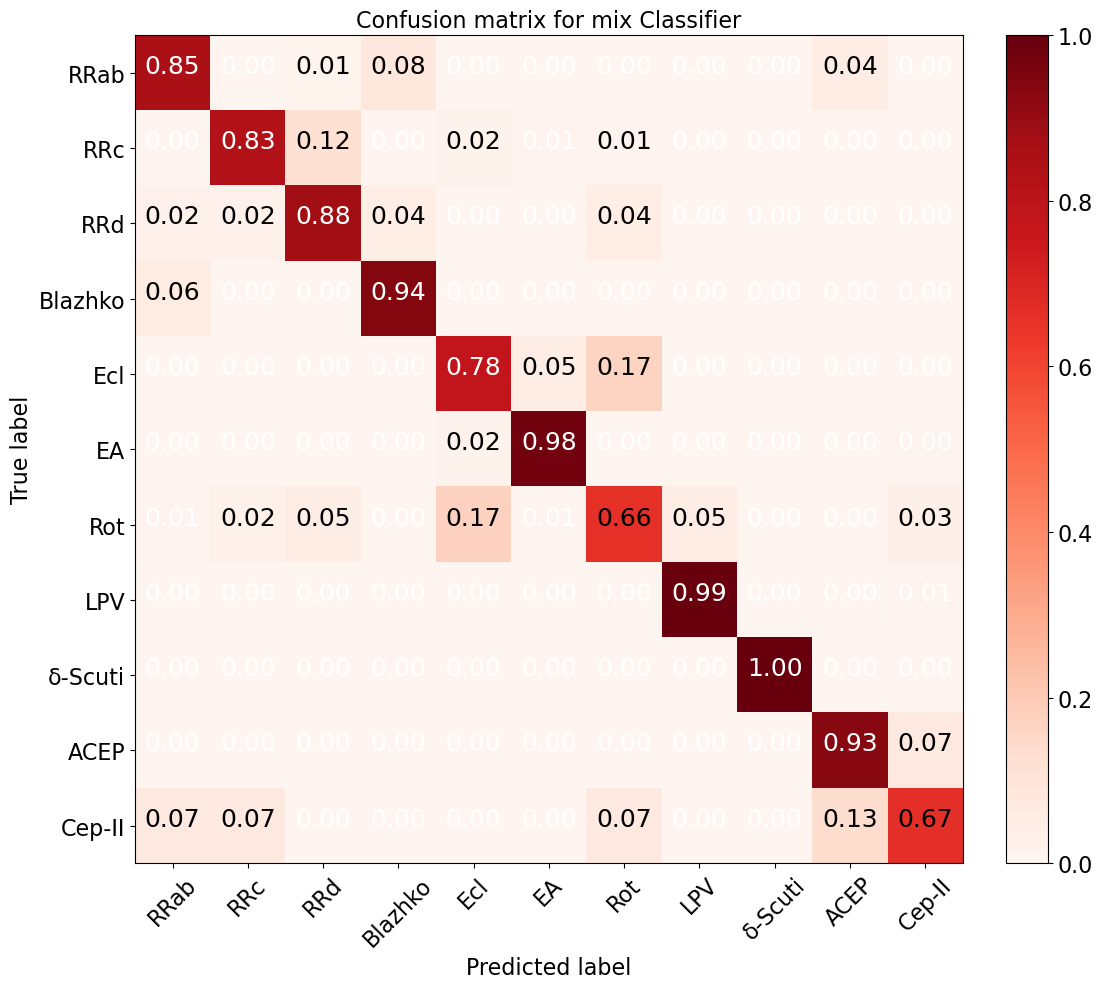

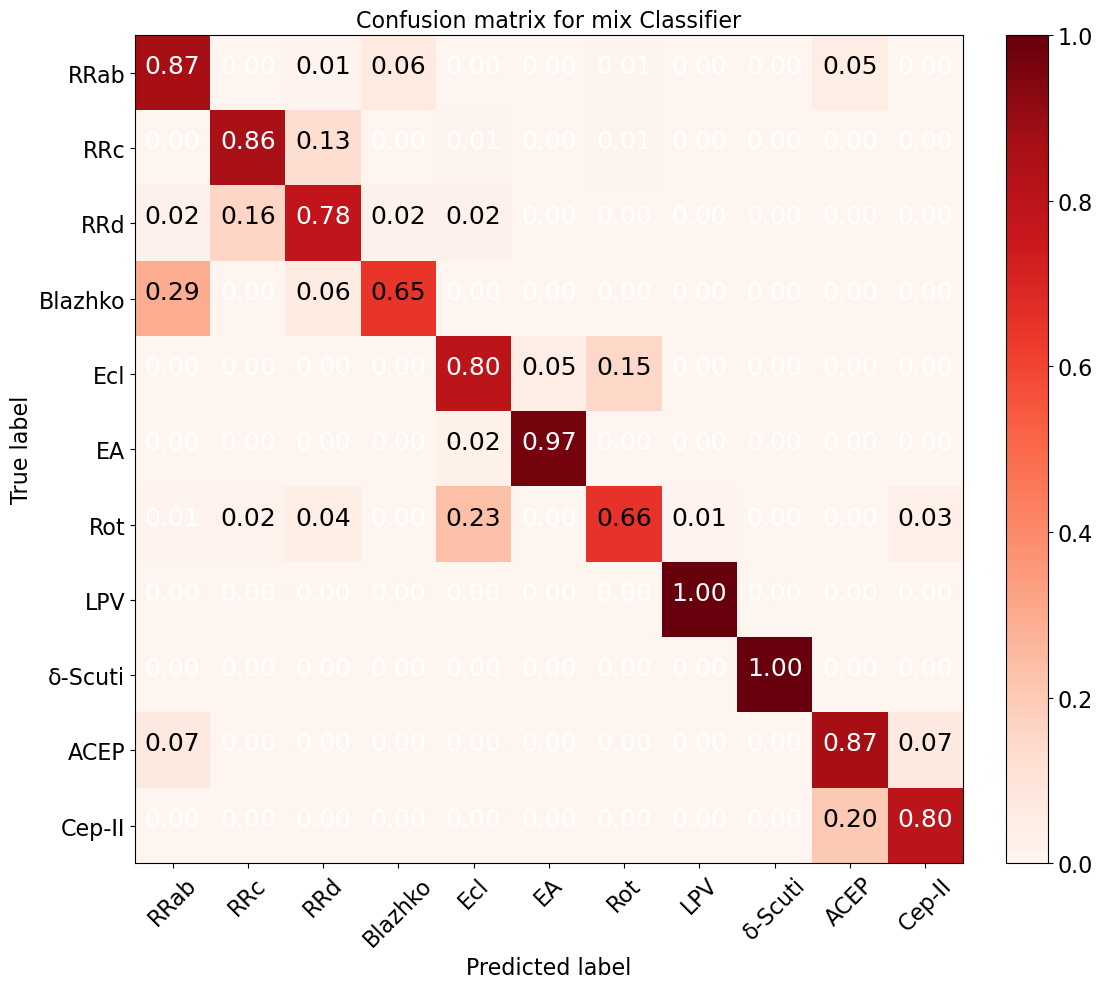

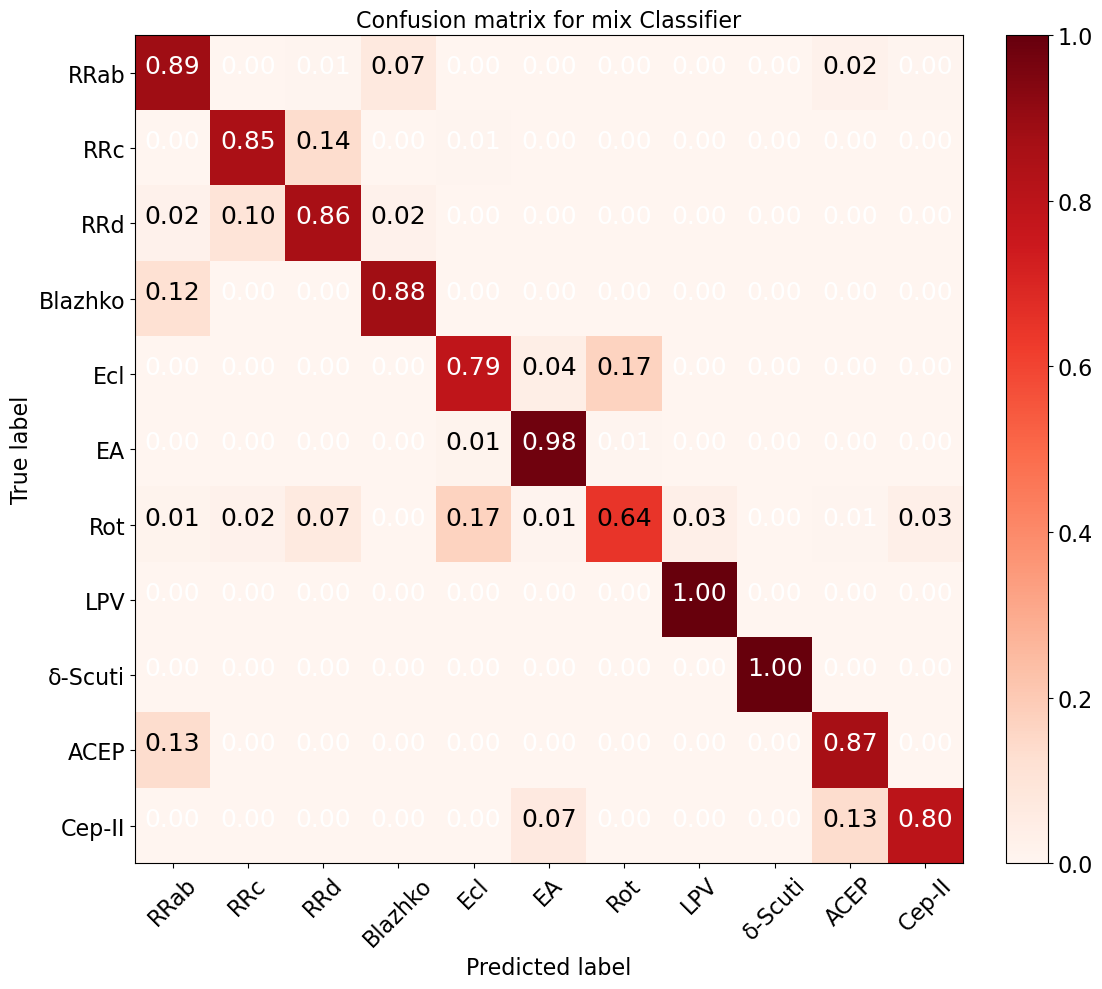

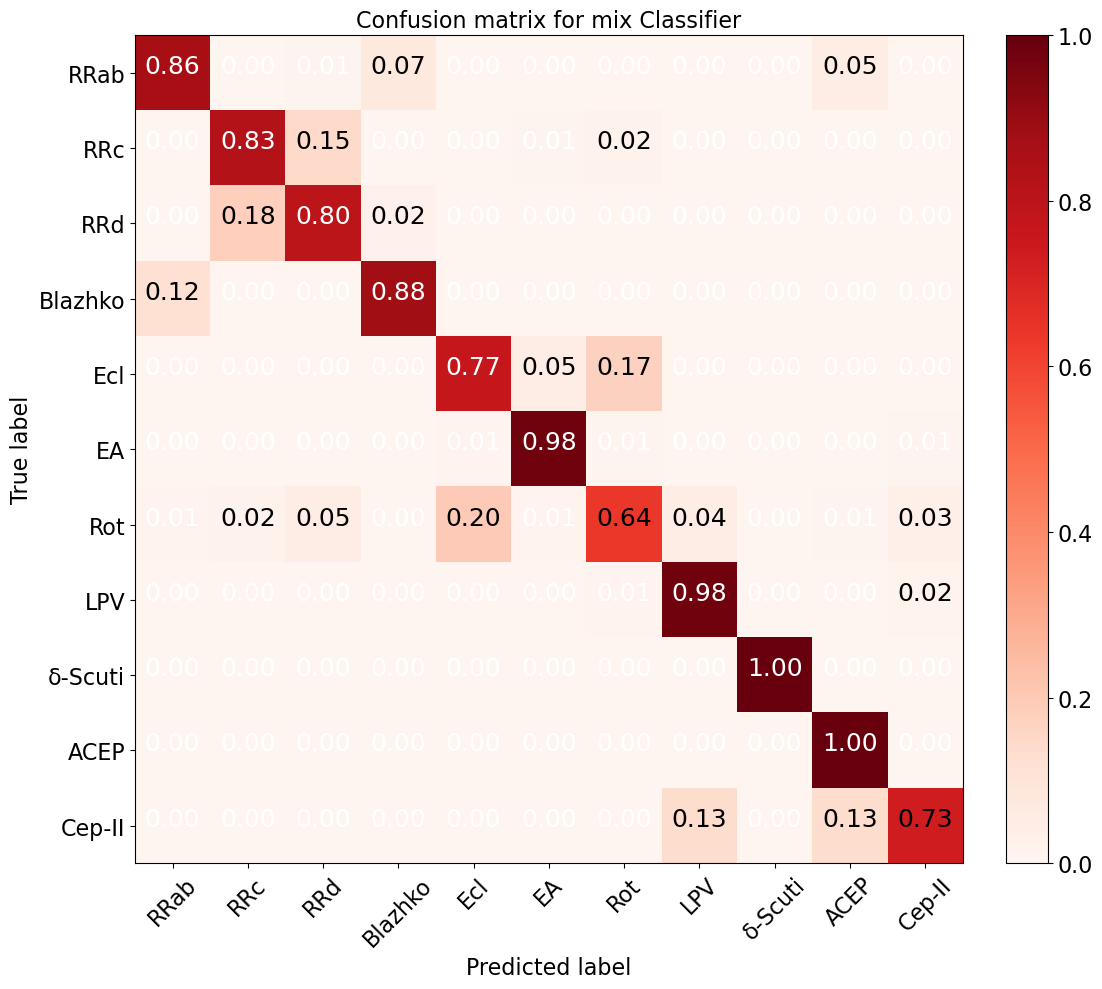

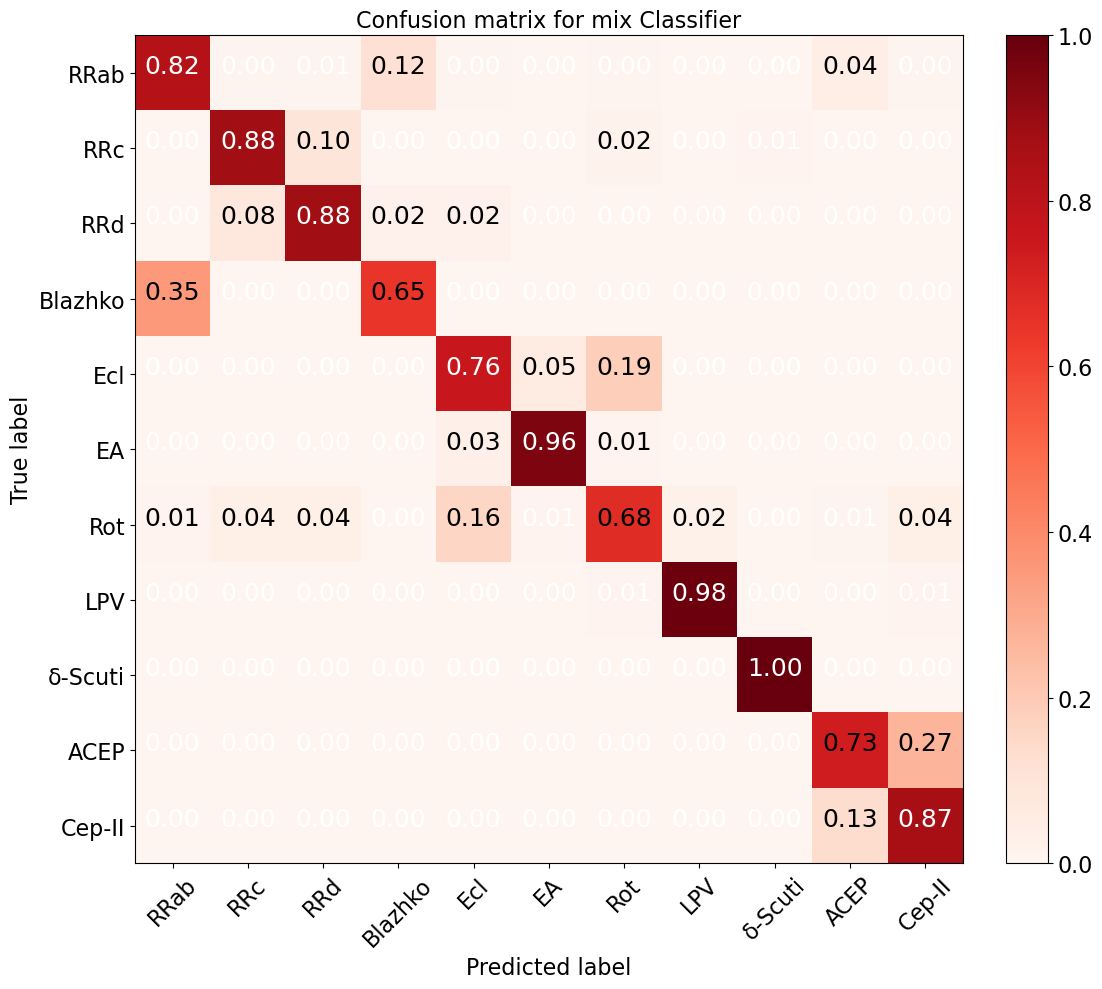

In [8]:
total_cms = []
best_acc_list = [[4, 4, 4, 6, 5, 8, 6, 7, 3, 4],
[4, 4, 3, 3, 5, 8, 2, 4, 4, 4],
[7, 6, 7, 6, 5, 4, 7, 4, 6, 3],
[7, 5, 3, 6, 3, 4, 4, 3, 8, 3],
[10, 4, 4, 5, 5, 6, 7, 6, 7, 4],
[4, 3, 4, 8, 6, 5, 4, 5, 3, 4],
[6, 3, 5, 8, 5, 3, 5, 7, 8, 4],
[6, 5, 6, 5, 4, 3, 4, 3, 7, 4],
[7, 5, 4, 4, 2, 7, 6, 5, 6, 5],
[7, 5, 6, 4, 3, 7, 7, 3, 5, 4]
]
min_loss_list = [[4, 6, 8, 6, 7, 8, 6, 7, 5, 7],
[7, 5, 7, 6, 5, 8, 5, 5, 5, 4],    
[7, 6, 7, 6, 8, 7, 7, 5, 5, 6],
[7, 5, 8, 6, 5, 6, 4, 7, 8, 5],
[6, 5, 7, 5, 5, 6, 5, 6, 7, 5],
[5, 7, 5, 8, 6, 8, 5, 5, 4, 5],
[6, 6, 4, 8, 7, 8, 5, 6, 8, 7],
[7, 5, 6, 5, 8, 5, 4, 3, 5, 4],
[6, 3, 5, 4, 5, 5, 6, 5, 6, 5],
[7, 5, 4, 6, 5, 7, 5, 3, 5, 5]
]
for i in range(0,10):

    # f3 = open('data/split_10fold_No%d_aug_to_15000_down_sample_False_instance0-9/test_data'%i, 'rb')
    f3 = open('data/split_10fold_No%d_aug_to_2500_down_sample_True_instance0-9/test_data'%i, 'rb')
    X_sequence_test, X_feature_test, Y_test = pickle.load(f3)
    f3.close()

    from keras_preprocessing.sequence import pad_sequences
    X_sequence_test_paded = pad_sequences(X_sequence_test, dtype='float', padding='post', value = np.nan)

    from util import preprocess
    X_sequence_test_trimed = preprocess(X_sequence_test_paded)
    X_feature_test = np.array(X_feature_test)
    Y_test = np.array(Y_test)-1
    Y_test_one_hot = keras.utils.to_categorical(Y_test, num_classes=11)

    models = []
    for j in range(0,10):
        lodaed_model = keras.models.load_model('models/10fold%d/bagging0/rnn_with_feature%d/model_%d'%(i,j, min_loss_list[i][j]))
        models.append(lodaed_model)

    test_gen = generate_batch(X_sequence=X_sequence_test_trimed, X_feature=X_feature_test, Y=Y_test, batch_size=128)      
    y_label = Y_test

    y_predict = np.array([])
    for x_sequence, x_image, x_feature, y in test_gen:
        results = []
        for model in models:
            results.append(model.predict({'sequence':x_sequence, 
                                            # 'image':x_image,
                                            'feature':x_feature}))
        average_result = np.sum(results, axis=0)
        y_predict = np.concatenate([y_predict, np.argmax(average_result, axis=-1)])
    y_label = y_label.astype(np.int32) 
    y_predict = y_predict.astype(np.int32) 
    cm = confusion_matrix(y_true=y_label, y_pred=y_predict, normalize='true')
    total_cms.append(cm)

    print('cm_no.%d'%i)
    plotting = cm_plot(cm, classes_types=classes, classifier_model='mix Classifier', nClasses=11,
                        cmap=plt.cm.Blues)
    plotting.show()

In [12]:
f = open('total_cms_cross_bagging_min_loss','wb')
pickle.dump(total_cms,f)
f.close()

Confusion matrix, without normalization
[[8.72685185e-01 2.31481481e-03 8.10185185e-03 7.63888889e-02
  1.15740741e-03 0.00000000e+00 2.31481481e-03 0.00000000e+00
  0.00000000e+00 3.70370370e-02 0.00000000e+00]
 [0.00000000e+00 8.54666667e-01 1.18666667e-01 0.00000000e+00
  5.33333333e-03 1.33333333e-03 1.20000000e-02 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 1.30000000e-01 8.30000000e-01 2.00000000e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.47058824e-01 0.00000000e+00 0.00000000e+00 7.64705882e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.31914894e-04 5.31914894e-04 5.31914894e-04 0.00000000e+00
  7.82712766e-01 5.05319149e-02 1.67021277e-01 2.65957447e-04
  0.00000000e+00 1.06382979e-03 1.06382979e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.11111111e-02 9.68888889e-01 4.4444

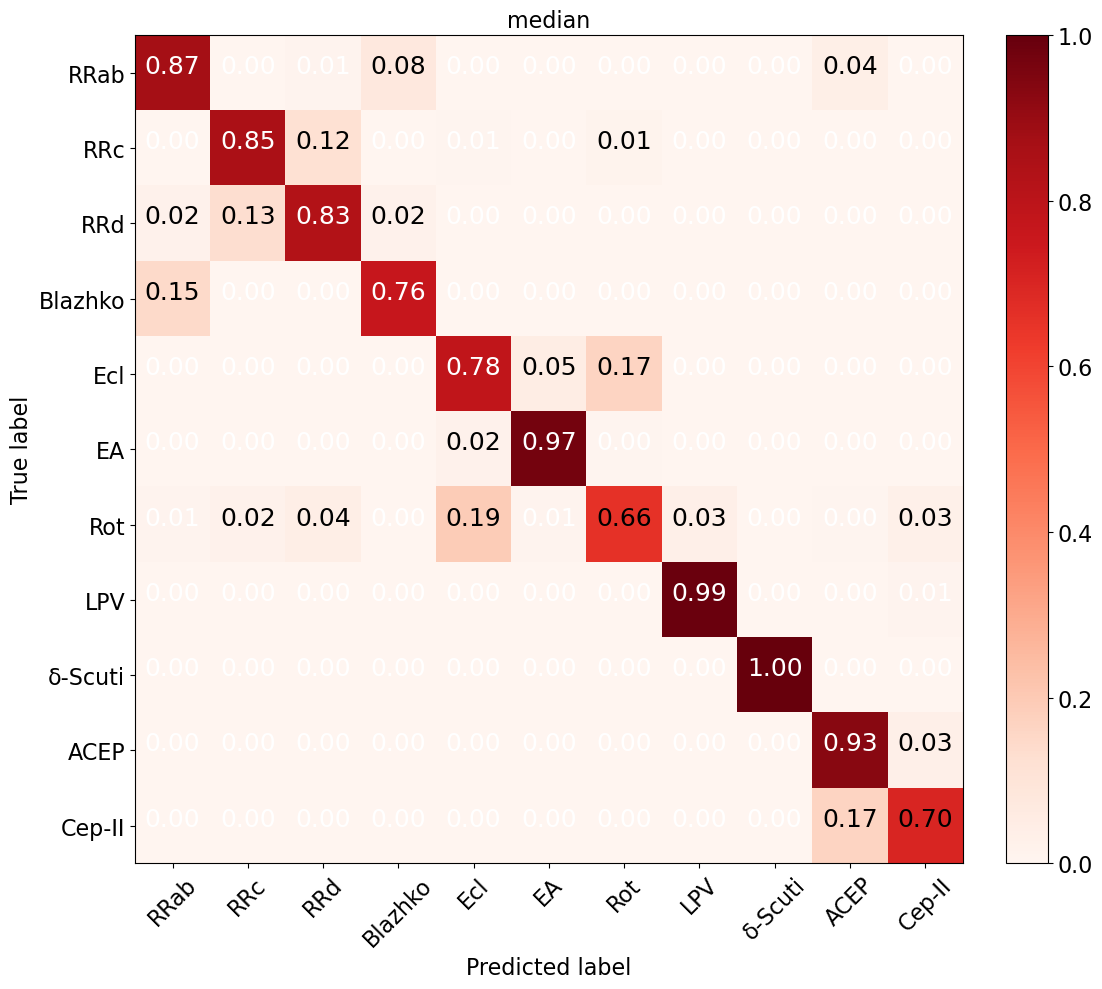

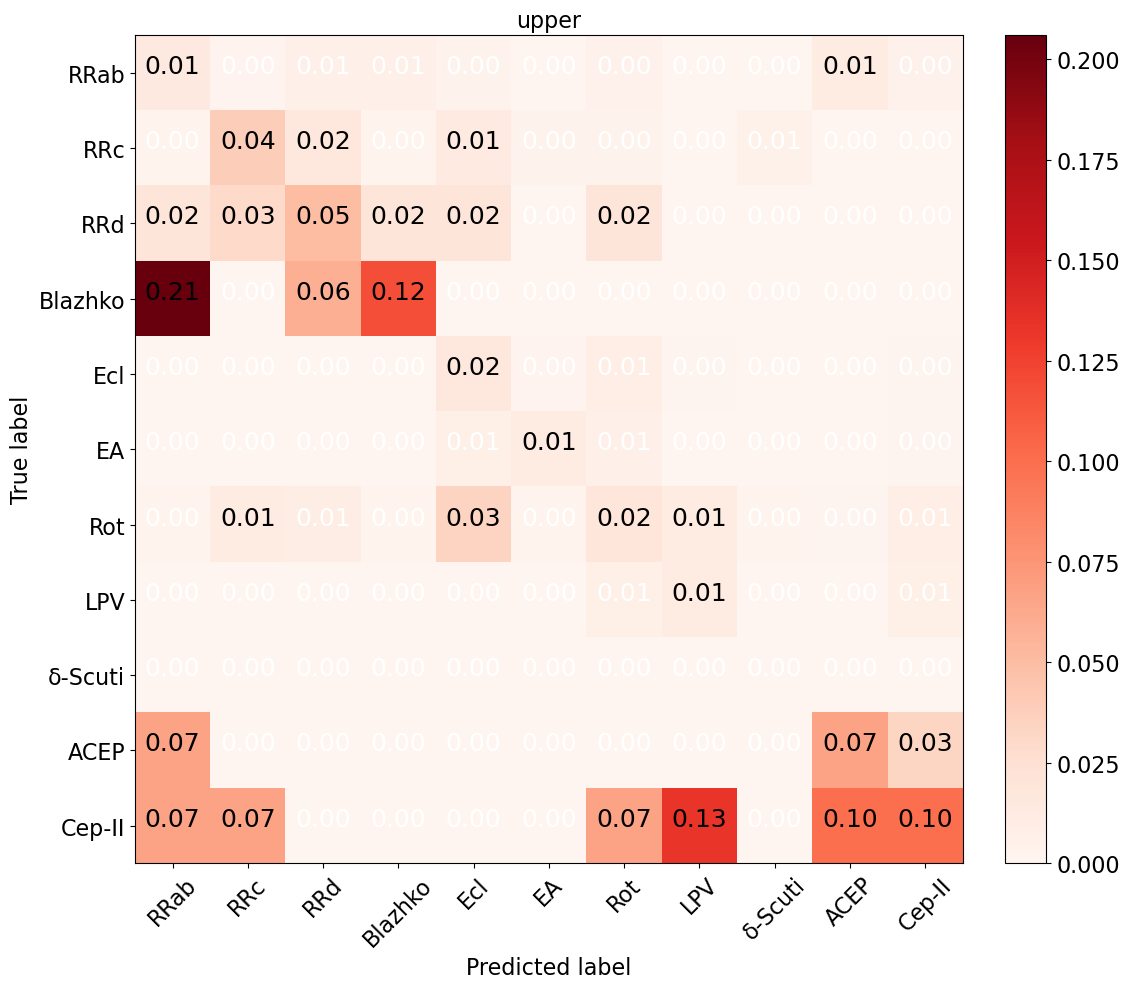

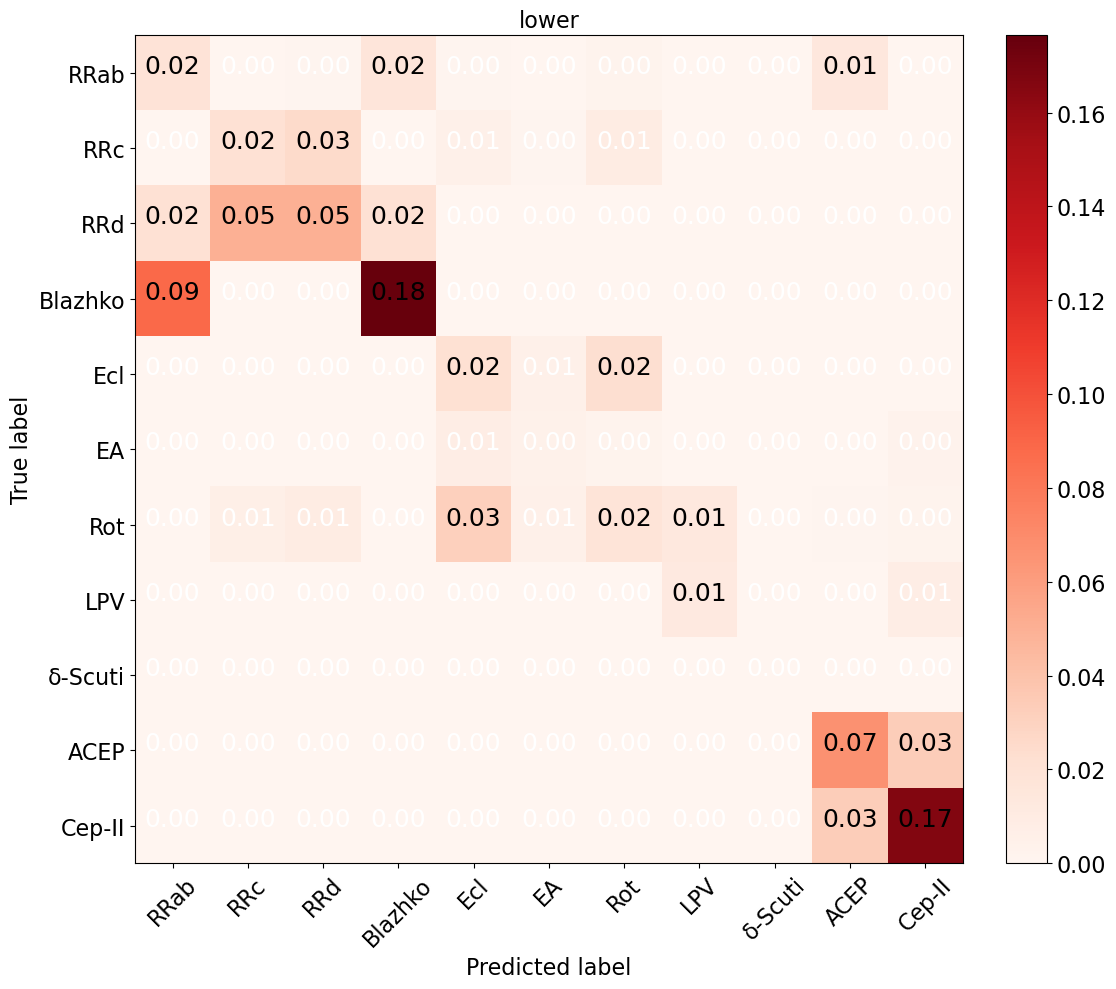

In [13]:
# f = open('total_cms_cross_bagging_best_acc','rb')
# total_cms = pickle.load(f)
# f.close()
total_cms = np.array(total_cms)
mid_cm = np.median(total_cms, axis=0)
sorted_total_cms = np.sort(total_cms, axis=0)
uppers = np.zeros(mid_cm.shape)
lowers = np.zeros(mid_cm.shape)
for i in range(0,11):
    for j in range(0,11):
        uppers[i][j] = sorted_total_cms[-2][i][j] - mid_cm[i][j]
        lowers[i][j] = mid_cm[i][j] - sorted_total_cms[1][i][j]

from util import plot_confusion_matrix
fig = plot_confusion_matrix(mid_cm, classes, normalize=False, title='median')
fig.show()
fig = plot_confusion_matrix(uppers, classes, normalize=False, title='upper' )
fig.show()
fig = plot_confusion_matrix(lowers, classes, normalize=False, title='lower' )
fig.show()
# f = open('total_cms_cross_bagging_best_acc','wb')
# pickle.dump(total_cms, f)
# f.close()

[[8.41435185e-01 2.31481481e-03 8.10185185e-03 9.25925926e-02
  1.15740741e-03 0.00000000e+00 2.31481481e-03 0.00000000e+00
  0.00000000e+00 4.28240741e-02 1.15740741e-03]
 [1.33333333e-03 8.48000000e-01 1.18666667e-01 0.00000000e+00
  6.66666667e-03 1.33333333e-03 8.00000000e-03 0.00000000e+00
  5.33333333e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 1.40000000e-01 8.10000000e-01 2.00000000e-02
  0.00000000e+00 0.00000000e+00 1.00000000e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.76470588e-01 0.00000000e+00 0.00000000e+00 8.23529412e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06382979e-03 2.65957447e-04 5.31914894e-04 0.00000000e+00
  7.71276596e-01 5.26595745e-02 1.70478723e-01 2.65957447e-04
  5.31914894e-04 7.97872340e-04 1.59574468e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.66666667e-02 9.75555556e-01 5.55555556e-03 0.00000000e+00
  0.00000000e+00

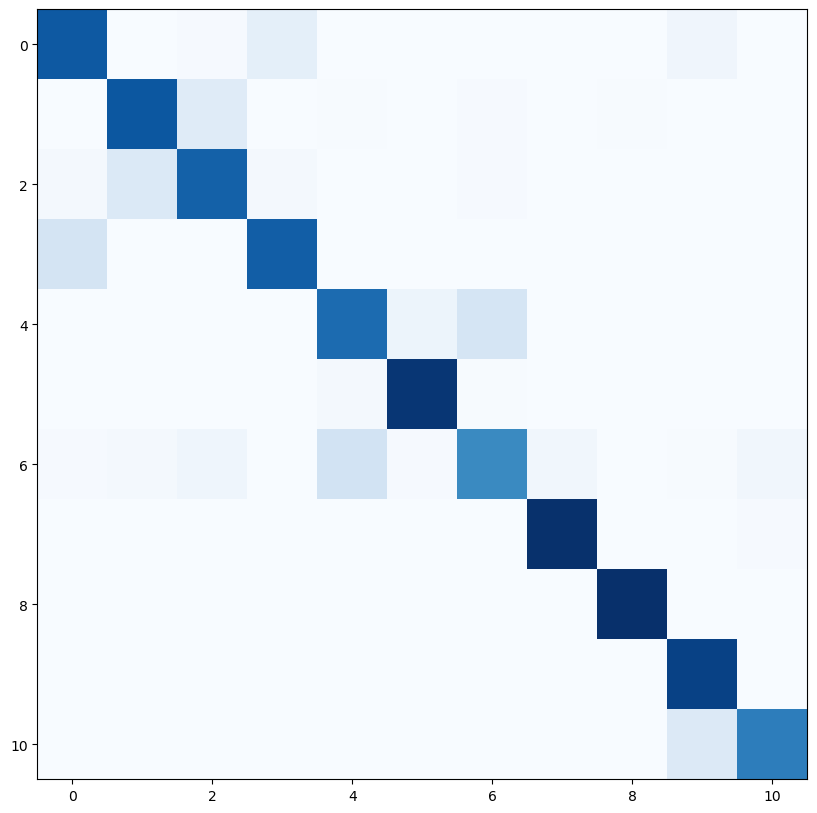

In [7]:
print(mid_cm)
print(uppers.dtype)
print(lowers.dtype)
fig, ax = plt.subplots(figsize=(12, 10))
plt.imshow(mid_cm, interpolation='nearest', cmap=plt.cm.Blues)

Normalized confusion matrix
[[ 87.   0.   1.   8.   0.   0.   0.   0.   0.   4.   0.]
 [  0.  85.  12.   0.   1.   0.   1.   0.   0.   0.   0.]
 [  2.  13.  83.   2.   0.   0.   0.   0.   0.   0.   0.]
 [ 15.   0.   0.  76.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  78.   5.  17.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   2.  97.   0.   0.   0.   0.   0.]
 [  1.   2.   4.   0.  19.   1.  66.   3.   0.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.  99.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  93.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  17.  70.]]


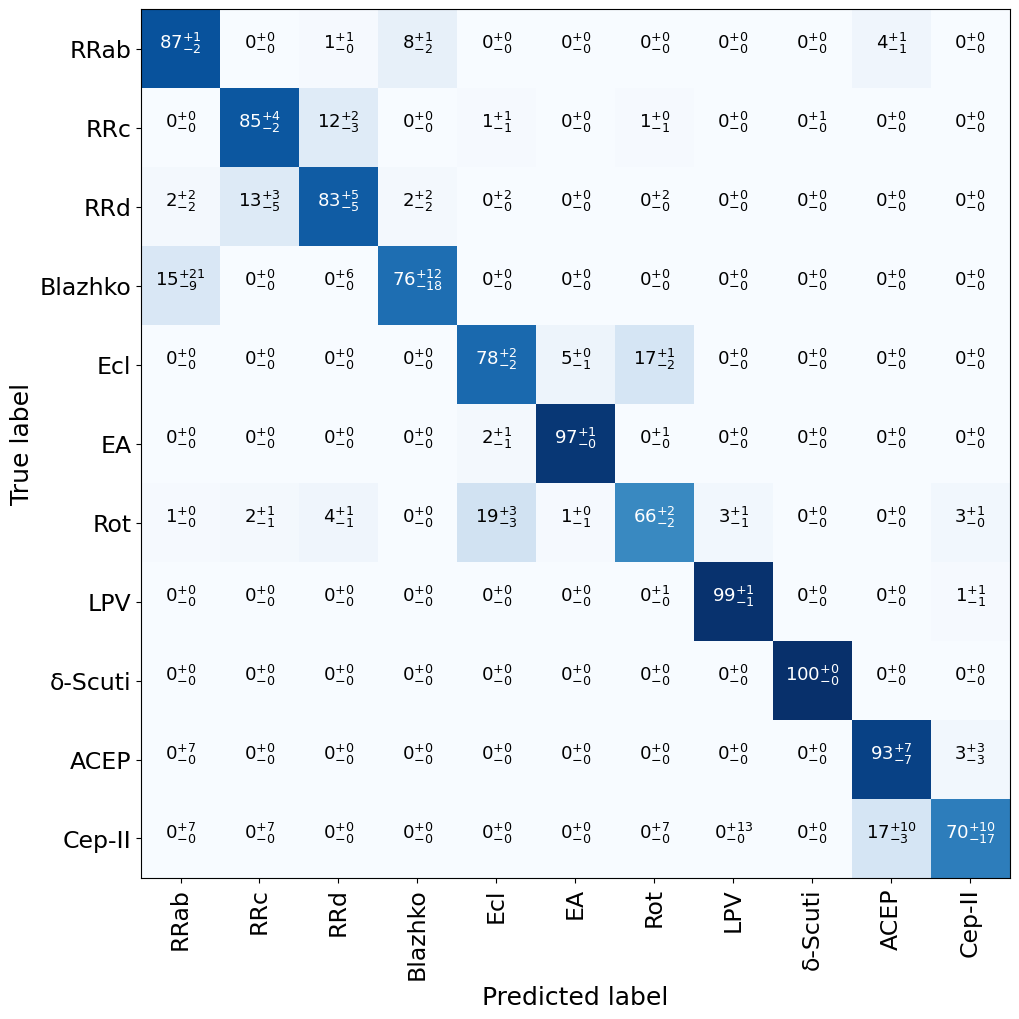

In [14]:

import itertools
from statistics import median
def plot_confusion_matrix(cm, cm_2,cm_3,classes, plot_name,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm * 100)
        print("Normalized confusion matrix")
        cm_2 = np.round(cm_2* 100)
        cm_3 = np.round(cm_3 * 100)
        # cm = np.round((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100)
        # print("Normalized confusion matrix")
        # cm_2 = np.round((cm_2.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100)
        # cm_3 = np.round((cm_3.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100)

    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=17)
    plt.yticks(tick_marks, classes, fontsize=17)

    # fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%d$_{-%d}^{+%d}$"% (cm[i, j],cm_2[i,j],cm_3[i,j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=13)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.savefig(plot_name, bbox_inches='tight')
    # plt.close()

plot_confusion_matrix(mid_cm, lowers,uppers, classes, 'name',
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)